**Decision Tree**


1.Data Preparation:

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
# Load the Excel file
excel_file = '/content/heart_disease.xlsx'

# Display all sheet names
sheet_names = pd.ExcelFile(excel_file).sheet_names
print("Sheets in the file:", sheet_names)

Sheets in the file: ['Description', 'Heart_disease']


In [83]:
# Load the "Data" sheet
df= pd.read_excel(excel_file, sheet_name="Heart_disease")

In [84]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


2.Exploratory Data Analysis (EDA):

In [85]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [87]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [88]:
df.shape

(908, 13)

In [89]:
# Check for missing values
print(df.isnull().sum())

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


In [90]:
# Check for data types
print(df.dtypes)

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object


In [91]:
# Summary statistics
print(df.describe())

              age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811
std      9.158031   20.401608  112.097949   26.804929    1.093875    1.144436
min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.750000  120.000000  176.750000  118.000000    0.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.500000    1.000000
75%     60.000000  144.000000  270.000000  156.000000    1.500000    2.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    4.000000


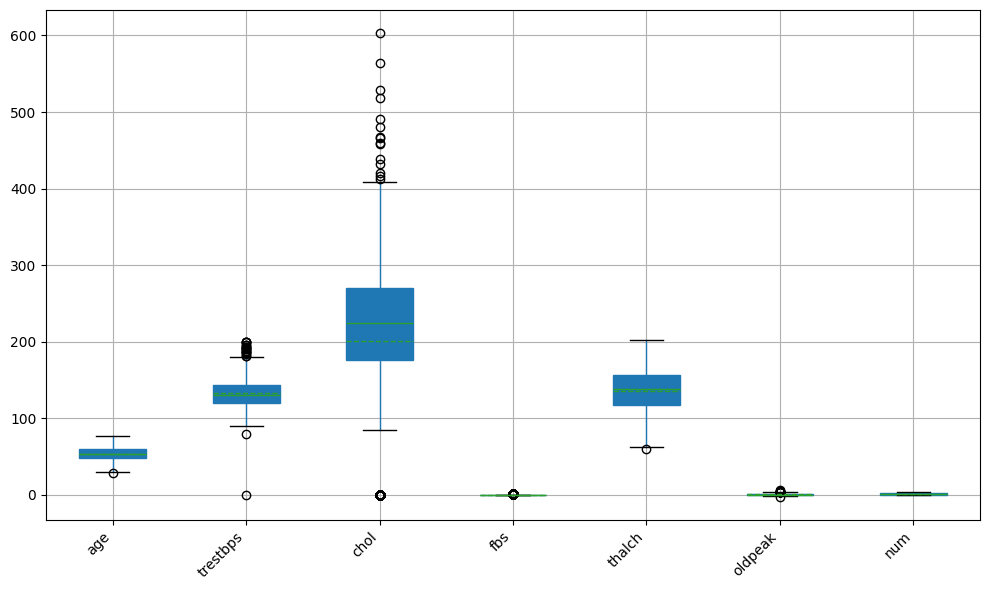

In [92]:
# Box plots for numerical features
plt.figure(figsize=(10, 6))
df.boxplot(patch_artist=True, showmeans=True, meanline=True)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [93]:
# Check for inconsistencies (e.g., unexpected data types, values outside valid ranges)
for col in df.columns:
    print(f"\nColumn: {col}")
    print(f"Unique Values: {df[col].unique()}")
    print(f"Data Type: {df[col].dtype}")


Column: age
Unique Values: [63 41 57 52 66 56 48 53 30 54 37 46 68 76 58 42 64 71 69 45 44 39 62 50
 55 49 43 51 36 59 61 60 67 70 47 65 38 34 35 29 74 75 40 72 31 73 33 32
 77]
Data Type: int64

Column: sex
Unique Values: ['Male' 'Female']
Data Type: object

Column: cp
Unique Values: ['typical angina' 'atypical angina' 'asymptomatic' 'non-anginal']
Data Type: object

Column: trestbps
Unique Values: [145 135 140 118 110 160 130 155 170 150 125 120 142 100 102 112 146 138
 134 122 136 108 115 104 128 106 156 129 124 126 132 105 152 148  94 180
 178 101 172  80 114 190 113 154 175 133 131 181 188 193 153 179 143  90
  96 163 161 196 107 167 174 158 192 185 144 169  95  92 200 127 121 166
 177 165 117 116 184  97 186 164 123 151   0 137 182]
Data Type: int64

Column: chol
Unique Values: [233 203 192 186 201 228 276 211 260 175 237 226 273 197 240 250 177 248
 265 303 149 234 160 264 242 302 278 220 294 394 214 219 271 213 245 196
 209 141 340 318 243 238 222 208 236 178 275 308 223 204 2

In [94]:
# Check for outliers using the IQR method (more robust than boxplots)
def find_outliers_iqr(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

for col in df.select_dtypes(include=np.number):
  outliers = find_outliers_iqr(df[col])
  if not outliers.empty:
      print(f"\nOutliers in {col}: {outliers.values}")
      print(f"Number of outliers in {col}: {len(outliers)}")


Outliers in age: [29]
Number of outliers in age: 1

Outliers in trestbps: [ 80 190 181 188 193 196 192 185 200 184 192 186 200 200 200 188   0 182
 196 193 186 190]
Number of outliers in trestbps: 22

Outliers in chol: [417 439   0 564   0   0 458   0   0   0   0   0   0   0   0   0   0   0
   0 481   0 459 432 468 412 421   0   0   0   0   0   0 466   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0 603   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 518 529 491   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0]
Number of outliers i

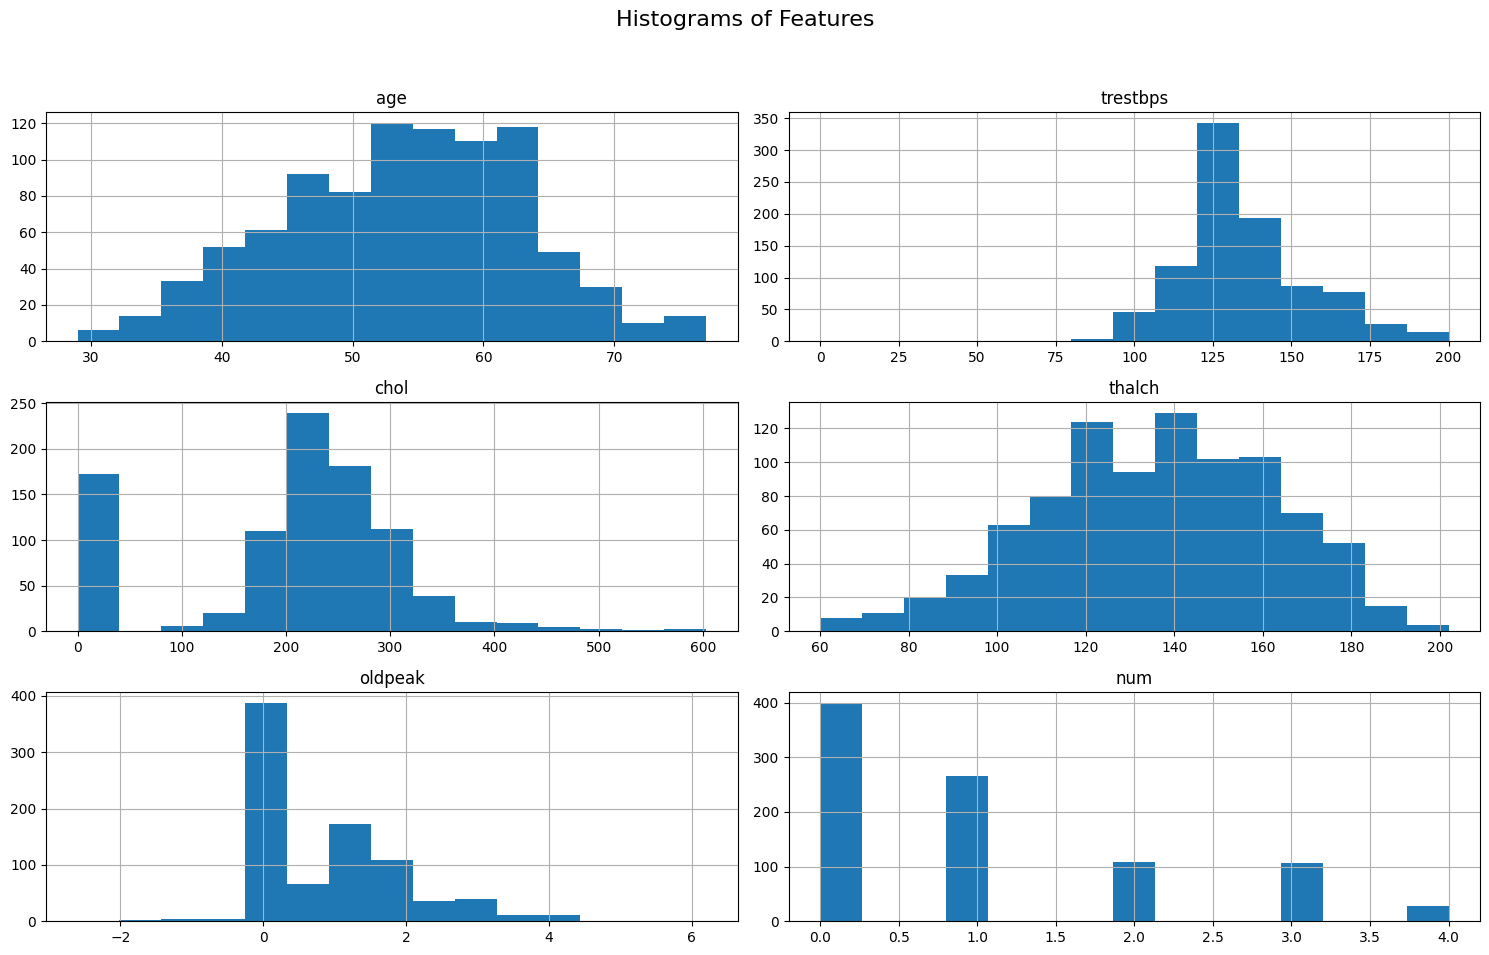

In [95]:
# 1. Histograms
df.hist(figsize=(15, 10), bins=15)  # Adjust figsize and bins as needed
plt.suptitle("Histograms of Features", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to prevent overlapping titles
plt.show()

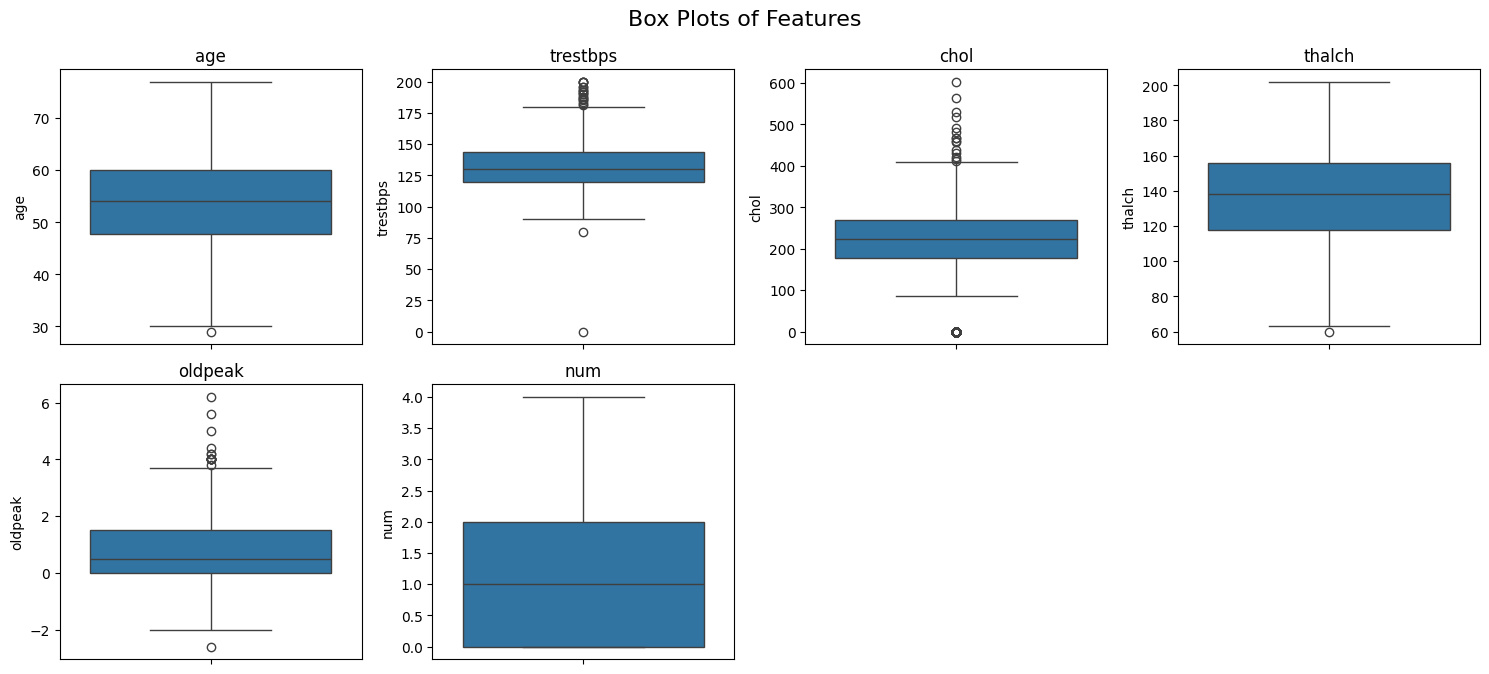

In [96]:
# 2. Box Plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=np.number).columns): # Only include numerical columns
    plt.subplot(3, 4, i + 1)  # Adjust subplot grid as needed
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.suptitle("Box Plots of Features", fontsize=16)
plt.subplots_adjust(top=0.92) # Adjust the top spacing
plt.show()

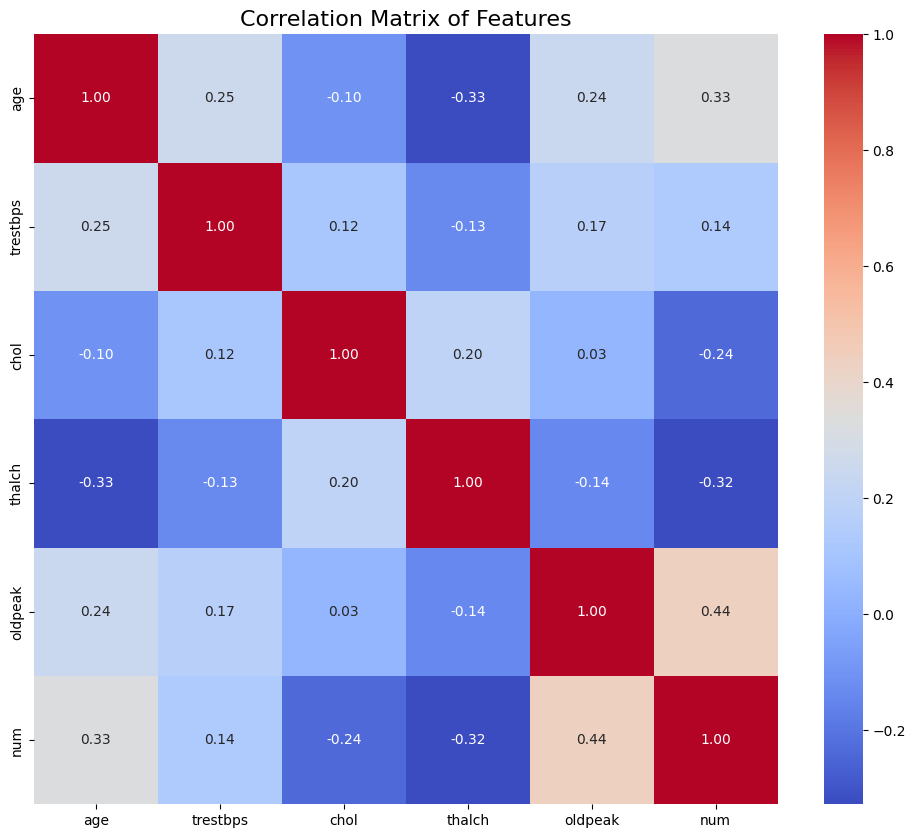

In [97]:
# 3. Correlation Matrix (Heatmap)
plt.figure(figsize=(12, 10))
# Include only numerical features for correlation calculation
correlation_matrix = df.select_dtypes(include=np.number).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Features", fontsize=16)
plt.show()


3.Feature Engineering:

In [98]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
# Import Pipeline
from sklearn.pipeline import Pipeline

In [99]:
# Identify numerical and categorical features
numerical_features = df.select_dtypes(include=np.number).columns
categorical_features = df.select_dtypes(exclude=np.number).columns

# ----> Convert boolean columns to strings BEFORE feature identification <----
for col in df.columns:  # Iterate through all columns
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(str)

# Now identify categorical features again (after the conversion)
categorical_features = df.select_dtypes(exclude=np.number).columns


In [100]:
# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [101]:
# Before applying the preprocessor, convert boolean columns to strings:
for col in categorical_features:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(str)
    elif df[col].dtype == 'object':  # Add this condition to handle object dtype
        df[col] = df[col].astype(str)  # Convert object dtype to string

# Apply the preprocessor to the DataFrame
df_processed = preprocessor.fit_transform(df)


In [102]:
# Convert the processed data back to a DataFrame (optional)
feature_names = list(numerical_features)
# Get feature names for all categorical features at once
categorical_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
feature_names.extend(categorical_feature_names)

df_processed = pd.DataFrame(df_processed, columns=feature_names)

# Now df_processed contains the feature-engineered data ready for model training
print(df_processed.head())

        age  trestbps      chol    thalch   oldpeak       num  sex_Female  \
0  1.006027  0.567394  0.281297  0.524183  1.354403 -0.881977         0.0   
1 -1.397560  0.076967  0.013526 -0.147705 -0.815718 -0.881977         0.0   
2  0.350503  0.322181 -0.084656  0.449529 -0.438305 -0.881977         0.0   
3 -0.195767 -0.756760 -0.138211  2.017268 -0.815718 -0.881977         0.0   
4  0.350503 -1.149102 -0.004325 -0.371668  0.599578 -0.881977         0.0   

   sex_Male  cp_asymptomatic  cp_atypical angina  ...  exang_FALSE  \
0       1.0              0.0                 0.0  ...          0.0   
1       1.0              0.0                 1.0  ...          0.0   
2       1.0              1.0                 0.0  ...          0.0   
3       1.0              0.0                 0.0  ...          0.0   
4       1.0              1.0                 0.0  ...          0.0   

   exang_False  exang_TURE  exang_True  slope_downsloping  slope_flat  \
0          1.0         0.0         0.0     

4.Decision Tree Classification:

In [103]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import LabelBinarizer

In [104]:
import pandas as pd
from sklearn.datasets import load_iris  # Make sure load_iris is imported

In [105]:
# Load dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [106]:
# Features and target
X = df.iloc[:, :-1]
y = df['target']

# Split dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

In [107]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [108]:
# For ROC-AUC (requires binarized labels)
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)
y_pred_binarized = lb.transform(y_pred)
if y_test_binarized.shape[1] > 1:  # Multiclass
    roc_auc = roc_auc_score(y_test_binarized, y_pred_binarized, average='weighted', multi_class='ovr')
else:  # Binary
    roc_auc = roc_auc_score(y_test, y_pred)

In [109]:
# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC Score: 1.0


In [110]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


5.Hyperparameter Tuning:

In [111]:
from sklearn.model_selection import GridSearchCV

In [114]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy', 'log_loss']
}


In [115]:
# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,  # Use 5-fold cross-validation
                           scoring='accuracy')

In [116]:
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
Best Score: 0.9416666666666668


In [118]:
# Train a Decision Tree model with the best hyperparameters
best_clf = DecisionTreeClassifier(**best_params, random_state=42)
best_clf.fit(X_train, y_train)

# Make predictions using the best model
y_pred_best = best_clf.predict(X_test)

# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Accuracy of the best model:", accuracy_best)

Accuracy of the best model: 1.0


6.Model Evaluation and Analysis:

In [120]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

Accuracy: 1.0
Confusion Matrix:


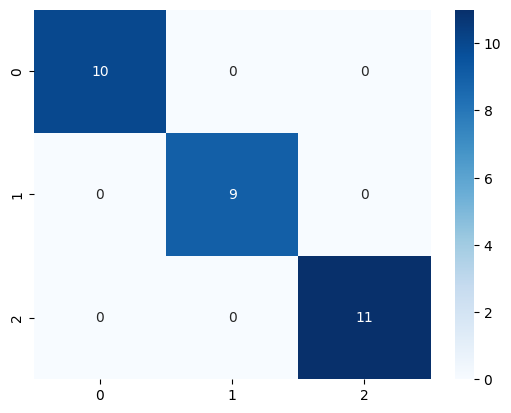

In [122]:
# Assuming y_test and y_pred are the actual and predicted values
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

In [123]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [125]:
# For binary classification, calculate ROC-AUC
# Get predicted probabilities using predict_proba
y_pred_proba = best_clf.predict_proba(X_test) # Changed best_model to best_clf

# Specify 'multi_class' for multi-class targets
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 1.0


In [126]:
from sklearn.tree import plot_tree

In [128]:
# Analyze feature importance
feature_importances = best_clf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance_df)


Feature Importance:
             Feature  Importance
2  petal length (cm)    0.906143
3   petal width (cm)    0.077186
1   sepal width (cm)    0.016670
0  sepal length (cm)    0.000000


In [129]:
# Further analysis of performance metrics:
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



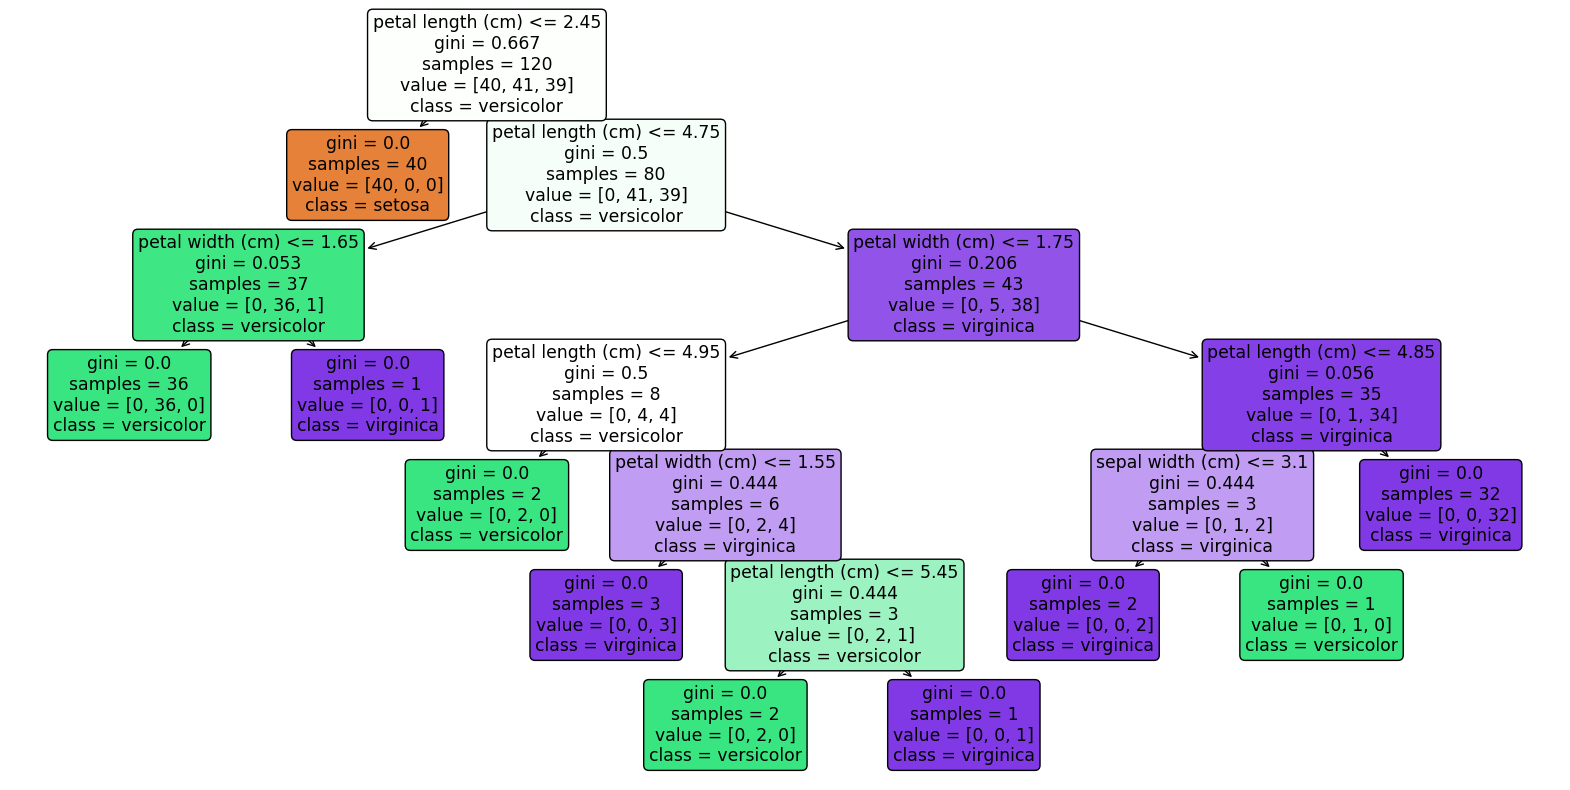

In [132]:
# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_clf, feature_names=X.columns, class_names=iris.target_names, filled=True, rounded=True)
plt.show()

# Interview Questions:


**1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?**
1.max_depth: Limits tree depth to prevent overfitting.

2.min_samples_split: Minimum samples to split a node; higher values reduce overfitting.

3.min_samples_leaf: Minimum samples per leaf; prevents small, overfitted leaves.

4.criterion: Split quality measure (e.g., "gini" or "entropy").

5.max_features: Maximum features to consider for a split. Effect: Reduces variance but may increase bias if too few features are used.

6.max_leaf_nodes: Limits the number of leaf nodes. Effect: Simplifies the tree, controlling overfitting.

7.random_state: Sets seed for reproducibility.


2.What is the difference between the Label encoding and One-hot encoding?
Label Encoding:

Converts categories into integers (e.g., "Red" → 0, "Green" → 1).
Best for: Ordinal data where category order matters.
Limitation: May introduce false ordinal relationships in non-ordinal data.
One-Hot Encoding:

Creates binary columns for each category (e.g., "Red" → [1, 0, 0]).

Best for: Non-ordinal data to avoid implying relationships.

Limitation: Can increase feature dimensionality for many categories.